# Tutorial 1

## Outline:
* Jupyter notebooks
* Visualizing univariate and multivariate functions
* Minimization using CG/BFGS 
* Time your function
* Golden section example

## Visualizing univariate and multivariate functions

### Univariate function


In [1]:
# These are some imports generally needed for scientific computing
from pylab import *

# to show figures inline
%matplotlib inline  

In [2]:
def func(x):
    f=x**3-3*x+2
    return f


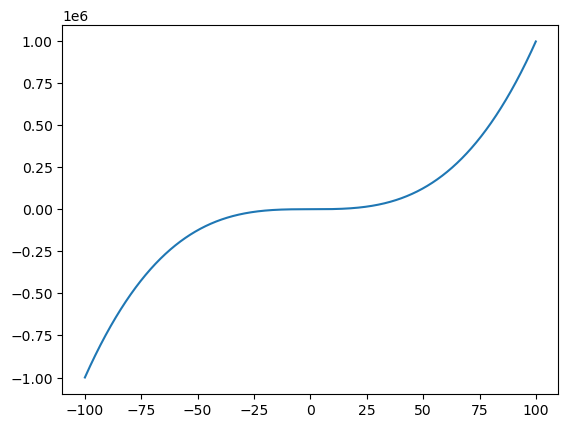

In [5]:
import matplotlib.pyplot as plt

x = np.arange(-100, 100, 0.1)
y = func(x)

plt.plot(x, y)

In [ ]:
x = np.linspace(0, 10, 100)   # generate 0, 0.1, 0.2, ..., 99.9, 100

### Multivariate function

I want to know what function $f(x,y)=x^4-x^2+y^2-2xy-2$ looks like. How to do this?

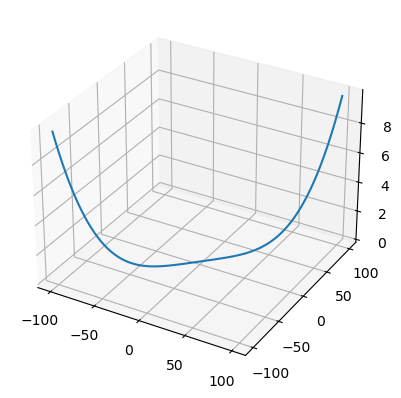

In [9]:
# To plot 3D graphs, you need to use 3D axes
from mpl_toolkits.mplot3d import Axes3D

def func_3d(x, y):
    f=x**4-x**2+y**2-2*x*y-2
    return f

x = np.arange(-100, 100, 0.1)
y = np.arange(-100, 100, 0.1)
f = func_3d(x, y)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(x, y, f)

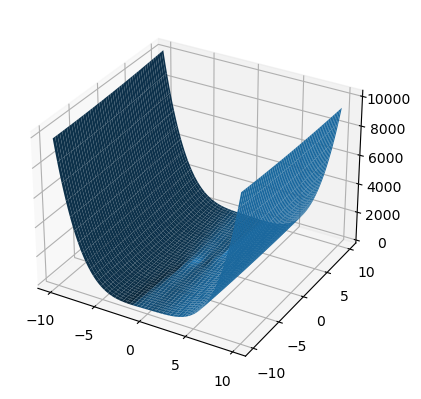

In [16]:
a = np.arange(-10, 10, 0.1)
x, y = np.meshgrid(a, a)
f = func_3d(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, f)

## Minimization using CG/BFGS

The multivariate Rosenbrock function is given below:
$f(\vec{x})=\sum_{i=1}^{N-1}100(x_{i+1}-x_i^2)^2+(1-x_i^2)^2$ \
Use x0=np.array([1.3,0.7,0.8,1.9,1.2]) as starting porint and find minimum

In [24]:
from scipy.optimize import minimize
def Rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1]**2)**2)
x0=np.array([1.3,0.7,0.8,1.9,1.2])
res = minimize(Rosenbrock, x0, method='CG', options={'disp': True, 'gtol': 1e-5})
# iteration: the number of times x is updated
# func eval: how many times the Rosenbrock function is called, might be called more than 1 time in each iteration
# grad eval: 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 492
         Gradient evaluations: 82


In [25]:
res1 = minimize(Rosenbrock, x0, method='BFGS', options={'disp': True, 'gtol': 1e-5})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 150
         Gradient evaluations: 25


More on optimization: [Scipy tutorial on optimization](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

## Time your function
using decorator!

In [26]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

In [27]:
@timeit    # use as a decorator

def CG():
    res = minimize(Rosenbrock, x0, method='CG', options={'disp': True, 'gtol': 1e-5})
CG()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 492
         Gradient evaluations: 82
func:'CG' took: 0.0507 sec


In [28]:
@timeit    # use as a decorator

def BFGS():
    res1 = minimize(Rosenbrock, x0, method='BFGS', options={'disp': True, 'gtol': 1e-5})
BFGS()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 150
         Gradient evaluations: 25
func:'BFGS' took: 0.0187 sec


## Golden section example

Given the following function, can you find its minimum value in range $[0,9]$ using golden section?

In [38]:
def func(x):
    isarray=type(x) is np.ndarray
    coefs=np.array([8.001371477,
-24.06731415,
37.076044,
0,
-43.86909846,
44.42701101,
-22.0126204,
6.536434989,
-1.248082478,
0.157159012,
-0.012990941,
0.000678657,
-2.03269E-05,
2.66065E-07
])
    base=np.zeros((len(x) if isarray else 1,14))
    for i in range(1,14):
        base[:,i]+=x**i
    result=base.dot(coefs)
    return result if isarray else sum(result)

In [39]:
def golden_section(func, start, end, reference, tol):
    if end - start < tol:
        return {'x': reference, 'y': func(reference)}
    if reference - start > end - reference:
        new_reference = start + (reference - start) * 0.618
        if func(new_reference) > func(reference):
            return golden_section(func, new_reference, end, reference, tol)
        else:
            return golden_section(func, start, reference, new_reference, tol)
    else:
        new_reference = end - (end - reference) * 0.618
        if func(new_reference) > func(reference):
            return golden_section(func, start, new_reference, reference, tol)
        else:
            return golden_section(func, reference, end, new_reference, tol)

In [40]:
golden_section(func, 0, 9, 9*0.618, 1e-5)

{'x': 4.964253964254607, 'y': -11.400276695145294}